In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('P:/data csience/notebooks/telecom user/telecom_users.csv')
pd.options.display.max_columns=None
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [7]:
df.shape

(5986, 22)

In [8]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,1777.25,3546.5,5291.75,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.0,0.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.90,118.75


In [11]:
col_rename = {'MonthlyCharges':'MonthlyCharges(USD)','TotalCharges':'TotalCharges(USD)'}
df.rename(columns=col_rename,inplace=True)
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges(USD),TotalCharges(USD),Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [12]:
df.isnull().sum().sum()

0

In [18]:
df1 = df.loc[:,'gender':'Churn'].copy()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges(USD),TotalCharges(USD),Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5986 non-null   object 
 1   SeniorCitizen        5986 non-null   int64  
 2   Partner              5986 non-null   object 
 3   Dependents           5986 non-null   object 
 4   tenure               5986 non-null   int64  
 5   PhoneService         5986 non-null   object 
 6   MultipleLines        5986 non-null   object 
 7   InternetService      5986 non-null   object 
 8   OnlineSecurity       5986 non-null   object 
 9   OnlineBackup         5986 non-null   object 
 10  DeviceProtection     5986 non-null   object 
 11  TechSupport          5986 non-null   object 
 12  StreamingTV          5986 non-null   object 
 13  StreamingMovies      5986 non-null   object 
 14  Contract             5986 non-null   object 
 15  PaperlessBilling     5986 non-null   o

In [20]:
col_values = {1:'Yes',0:'No'}

In [23]:
df1['SeniorCitizen'].replace(col_values,inplace=True)

In [25]:
df1['SeniorCitizen']

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981     No
5982     No
5983     No
5984    Yes
5985     No
Name: SeniorCitizen, Length: 5986, dtype: object

In [26]:
df1['TotalCharges(USD)'] = pd.to_numeric(df1['TotalCharges(USD)'],errors='coerce')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5986 non-null   object 
 1   SeniorCitizen        5986 non-null   object 
 2   Partner              5986 non-null   object 
 3   Dependents           5986 non-null   object 
 4   tenure               5986 non-null   int64  
 5   PhoneService         5986 non-null   object 
 6   MultipleLines        5986 non-null   object 
 7   InternetService      5986 non-null   object 
 8   OnlineSecurity       5986 non-null   object 
 9   OnlineBackup         5986 non-null   object 
 10  DeviceProtection     5986 non-null   object 
 11  TechSupport          5986 non-null   object 
 12  StreamingTV          5986 non-null   object 
 13  StreamingMovies      5986 non-null   object 
 14  Contract             5986 non-null   object 
 15  PaperlessBilling     5986 non-null   o

In [33]:
df1[df1['TotalCharges(USD)'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges(USD),TotalCharges(USD),Churn
356,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [34]:
df1['TotalCharges(USD)'].fillna(0,inplace=True)

In [35]:
df1['TotalCharges(USD)'].isnull().sum()

0

In [37]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5986.0,32.468760,24.516391,0.00,9.0000,29.000,56.0,72.00
MonthlyCharges(USD),5986.0,64.802213,30.114702,18.25,35.6500,70.400,89.9,118.75
TotalCharges(USD),5986.0,2294.221559,2274.164124,0.00,401.5875,1408.575,3841.5,8684.80


In [38]:
df1.loc[:,'PhoneService':'StreamingMovies']

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No
2,Yes,Yes,Fiber optic,No,No,No,No,No,No
3,Yes,No,DSL,No,No,No,No,No,Yes
4,Yes,No,DSL,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...
5981,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes
5982,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes
5983,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5984,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes


In [40]:
%matplotlib inline

In [42]:
gender_cnt = df1['gender'].value_counts()
gender_cnt

Male      3050
Female    2936
Name: gender, dtype: int64

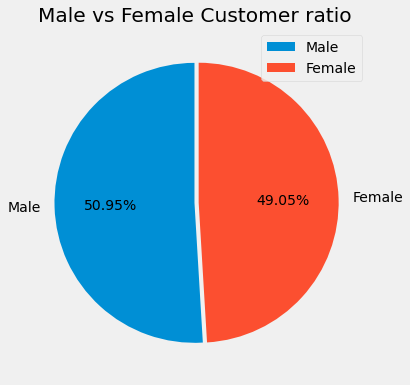

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.pie(gender_cnt, labels =['Male','Female'],autopct='%1.2f%%',startangle=90,explode=[0,0.03])
plt.title('Male vs Female Customer ratio')
plt.legend();

In [68]:
Monthly_avg = df1['MonthlyCharges(USD)'].mean()
print(f'Monthly Average charges for a Telecom user is {Monthly_avg}')

Monthly Average charges for a Telecom user is 64.8022134981624


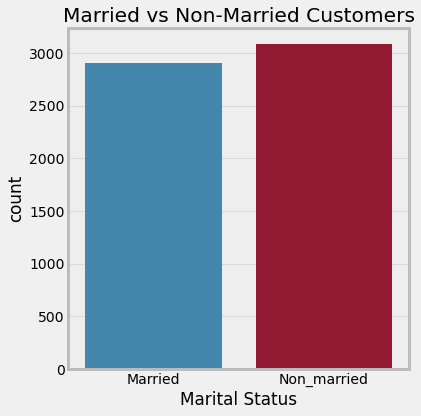

In [72]:
plt.style.use('bmh')
plt.figure(figsize=(6,6))
sns.countplot(x=df1['Partner'],linewidth=0.6)
plt.title('Married vs Non-Married Customers')
plt.xticks(ticks = np.arange(2),labels=['Married','Non_married'])
plt.xlabel('Marital Status')
plt.tight_layout();

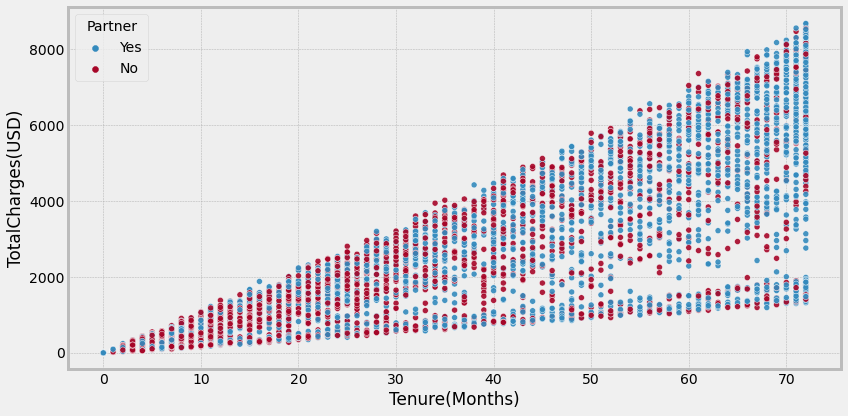

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['tenure'],y=df1['TotalCharges(USD)'],hue = df1['Partner'],alpha=0.9)
plt.xlabel('Tenure(Months)')
plt.tight_layout()

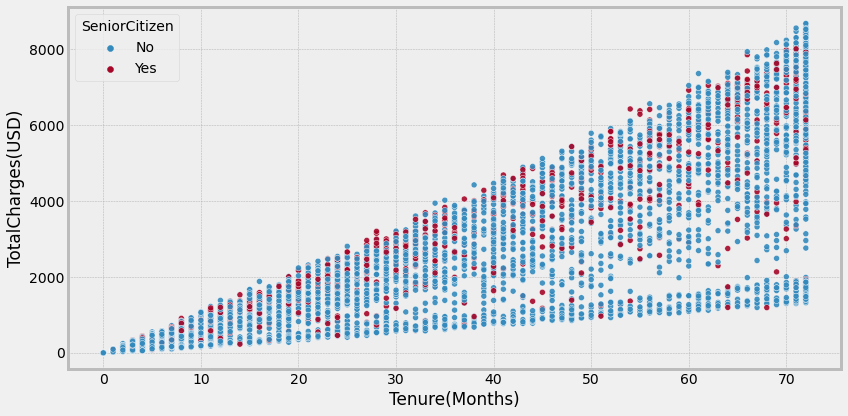

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['tenure'],y=df1['TotalCharges(USD)'],hue = df1['SeniorCitizen'],alpha=0.9)
plt.xlabel('Tenure(Months)')
plt.tight_layout()

In [89]:
SC = df1['SeniorCitizen'].value_counts(normalize=True)

In [97]:
print(f'Only {round(SC[1]*100,1)}% are Senior Citizen rest {round(SC[0]*100,2)}% are normal age Citizens')

Only 16.1% are Senior Citizen rest 83.86% are normal age Citizens


<AxesSubplot:xlabel='MonthlyCharges(USD)', ylabel='Count'>

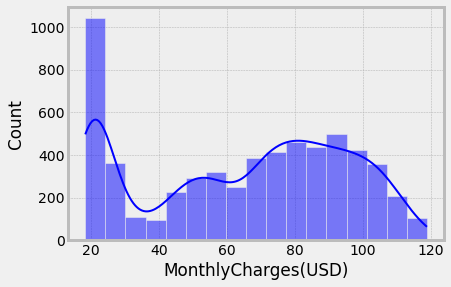

In [100]:
sns.histplot(df1['MonthlyCharges(USD)'],kde=True)

In [146]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges(USD)', 'TotalCharges(USD)', 'Churn'],
      dtype='object')

In [147]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges(USD),TotalCharges(USD),Churn
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [187]:
def Merge_all(x):
    Subscribed = []
    Subscribed.append('PS') if x[0] =='Yes' else None
    Subscribed.append('ML') if x[1] =='Yes' else None
    if x[2] == 'Fiber optic':
        Subscribed.append('IFC')
    elif x[2] == 'DSL':
        Subscribed.append('IDSL')
    else:
        None
    Subscribed.append('OS') if x[3] =='Yes' else None
    Subscribed.append('OB') if x[4] =='Yes' else None
    Subscribed.append('DP') if x[5] =='Yes' else None
    Subscribed.append('TS') if x[6] =='Yes' else None
    Subscribed.append('ST') if x[7] =='Yes' else None
    Subscribed.append('SM') if x[8] =='Yes' else None
    str1 = ","
    subs = str1.join(Subscribed)
    return subs
  

In [188]:
df1['All services'] = df1.loc[:,'PhoneService':'StreamingMovies'].apply(Merge_all,axis =1)
Service_counter = Counter()

In [189]:
df1['All services']

0                              PS,ML
1                    PS,IFC,OB,DP,ST
2                          PS,ML,IFC
3                         PS,IDSL,SM
4                      PS,IDSL,OS,DP
                    ...             
5981                 PS,IFC,OS,ST,SM
5982    PS,ML,IDSL,OS,OB,DP,TS,ST,SM
5983                              PS
5984              PS,ML,IFC,DP,ST,SM
5985                              PS
Name: All services, Length: 5986, dtype: object

In [190]:
for row in df1['All services']:
    Service_counter.update(row.split(','))

In [192]:
Service_counter

Counter({'PS': 5396,
         'ML': 2548,
         'IFC': 2627,
         'OB': 2090,
         'DP': 2055,
         'ST': 2306,
         'IDSL': 2068,
         'SM': 2339,
         'OS': 1713,
         'TS': 1735})

In [191]:
Service_name =[]
Service_Subscribed = []

for item in Service_counter.most_common():
    Service_name.append(item[0])
    Service_Subscribed.append(item[1])
    
print(Service_counter)

Counter({'PS': 5396, 'IFC': 2627, 'ML': 2548, 'SM': 2339, 'ST': 2306, 'OB': 2090, 'IDSL': 2068, 'DP': 2055, 'TS': 1735, 'OS': 1713})


In [193]:
Service_name

['PS', 'IFC', 'ML', 'SM', 'ST', 'OB', 'IDSL', 'DP', 'TS', 'OS']

In [194]:
Service_name = ['PhoneService','MultipleLines','Internet-FiberOptic','OnlineBackup','DeviceProtection','StreamingTV','Internet-DSL','StreamingMovies','OnlineSecurity','TechSupport']


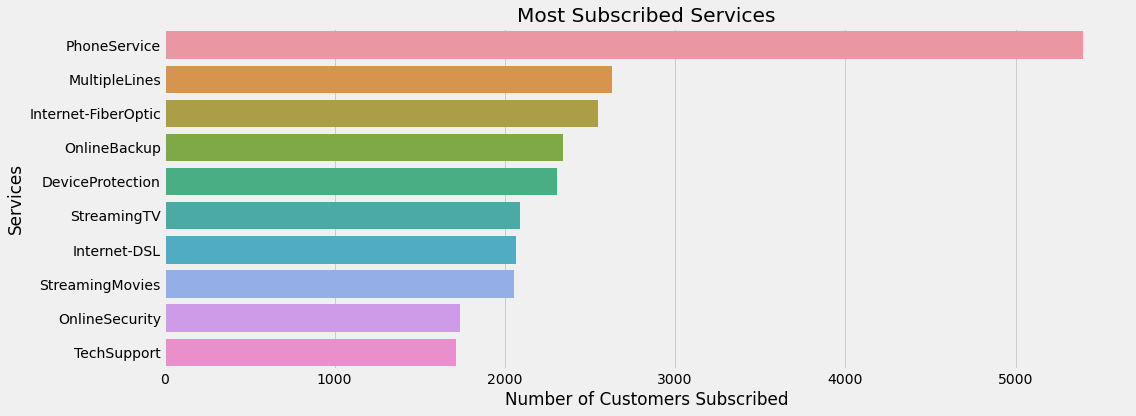

In [197]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
sns.barplot(x=Service_Subscribed, y=Service_name);
plt.title('Most Subscribed Services')
plt.ylabel('Services')
plt.xlabel('Number of Customers Subscribed')
plt.tight_layout();

In [200]:
df1['PaymentMethod'].value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: PaymentMethod, dtype: int64

In [210]:
labels = ['Electronic check','Mailed check','Bank Transfer','Credit card']

Text(0, 0.5, 'Customers')

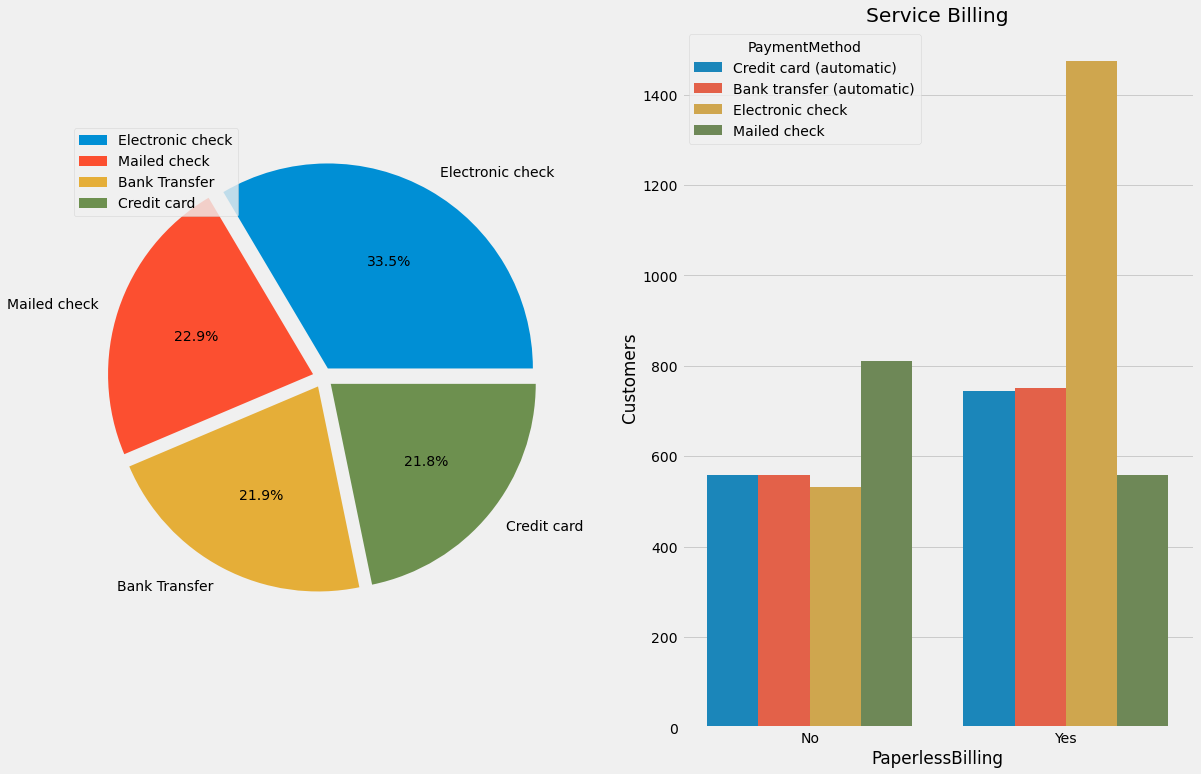

In [216]:
plt.figure(figsize=(18,12))
plt.subplot(121)
plt.pie(df1['PaymentMethod'].value_counts(),autopct='%1.1f%%',labels= labels, explode=[0.05,0.05,0.05,0.05])
plt.legend(loc='upper left');
plt.subplot(122)
sns.countplot(x=df1['PaperlessBilling'],hue = df1['PaymentMethod']);
plt.title('Service Billing')
plt.ylabel('Customers')

In [221]:
df1.sort_values('TotalCharges(USD)', ascending = False).loc[:,['tenure','TotalCharges(USD)','All services']].head(10)

,tenure,TotalCharges(USD),All services
2402,72,8684.80,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
126,72,8672.45,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
2039,72,8594.40,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
1510,71,8564.75,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
4866,72,8547.15,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
4221,72,8543.25,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
5524,72,8529.50,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
897,72,8496.70,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
1494,72,8477.70,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
262,71,8477.60,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"


In [224]:
df1.groupby('Contract')[['MonthlyCharges(USD)','TotalCharges(USD)']].max()

,MonthlyCharges(USD),TotalCharges(USD)
Contract,,
Month-to-month,117.45,7713.55
One year,118.60,8684.80
Two year,118.75,8672.45


In [225]:
df1.groupby('tenure')[['MonthlyCharges(USD)','TotalCharges(USD)']].max()

,MonthlyCharges(USD),TotalCharges(USD)
tenure,,
0,80.85,0.00
1,102.45,102.45
2,104.40,242.80
3,107.95,335.75
4,101.15,442.85
...,...,...
68,118.60,7990.05
69,116.00,8182.85
70,116.55,8244.30


In [229]:
sbp = df1[(df1['InternetService']==('Fiber optic'or 'DSL')) & (df1['StreamingTV']=='Yes') & (df1['StreamingMovies']=='Yes')]

In [248]:
sbp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges(USD),TotalCharges(USD),Churn,All services
9,Male,Yes,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No,"PS,ML,IFC,OS,OB,DP,TS,ST,SM"
12,Male,Yes,Yes,No,60,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,6017.90,No,"PS,ML,IFC,TS,ST,SM"
14,Female,No,No,No,32,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),109.55,3608.00,No,"PS,ML,IFC,OS,DP,TS,ST,SM"
15,Male,No,Yes,No,51,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.80,5498.80,No,"PS,ML,IFC,OB,DP,ST,SM"
18,Female,No,Yes,Yes,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,4186.30,Yes,"PS,ML,IFC,ST,SM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,Female,Yes,Yes,No,58,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.40,5749.80,No,"PS,ML,IFC,TS,ST,SM"
5976,Female,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.20,Yes,"PS,ML,IFC,OB,DP,TS,ST,SM"
5977,Male,Yes,Yes,No,64,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,102.10,6538.45,No,"PS,ML,IFC,DP,TS,ST,SM"
5981,Male,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,"PS,IFC,OS,ST,SM"


In [247]:
index = list(sbp['MonthlyCharges(USD)'].nsmallest(1).index)


In [249]:
sbp.loc[index,['MonthlyCharges(USD)','All services']]

,MonthlyCharges(USD),All services
925,87.55,"PS,IFC,ST,SM"


In [ ]:
One_year_contract = telecom_df[telecom_df['Contract']=='One year'].loc[:,['tenure','Contract','TotalCharges (USD)']].sort_values('TotalCharges (USD)')
Two_year_contract = telecom_df[telecom_df['Contract']=='Two year'].loc[:,['tenure','Contract','TotalCharges (USD)']].sort_values('TotalCharges (USD)')
Month_to_Month = telecom_df[telecom_df['Contract']=='Month-to-month'].loc[:,['tenure','Contract','TotalCharges (USD)']].sort_values('TotalCharges (USD)')


In [253]:
One_year_contract = df1[df1['Contract']=='One year'].loc[:,['tenure','Contract','TotalCharges(USD)']].sort_values('TotalCharges(USD)')
Two_year_contract = df1[df1['Contract']=='Two year'].loc[:,['tenure','Contract','TotalCharges(USD)']].sort_values('TotalCharges(USD)')
Month_to_Month = df1[df1['Contract']=='Month-to-month'].loc[:,['tenure','Contract','TotalCharges(USD)']].sort_values('TotalCharges(USD)')

In [254]:
oy = One_year_contract['TotalCharges(USD)'].sum()
ty = Two_year_contract['TotalCharges(USD)'].sum()
Mm = Month_to_Month['TotalCharges(USD)'].sum()

In [256]:
print(f'The charge applied by the telecom industry for One year Contract is {oy}$')
print(f'The charge applied by the telecom industry for Two year Contract is {ty}$')
print(f'The charge applied by the telecom industry for Month to Month Contract is {Mm}$')

The charge applied by the telecom industry for One year Contract is 3866446.1$
The charge applied by the telecom industry for Two year Contract is 5381964.8$
The charge applied by the telecom industry for Month to Month Contract is 4484799.350000001$


Text(0, 0.5, 'Number of Consumers')

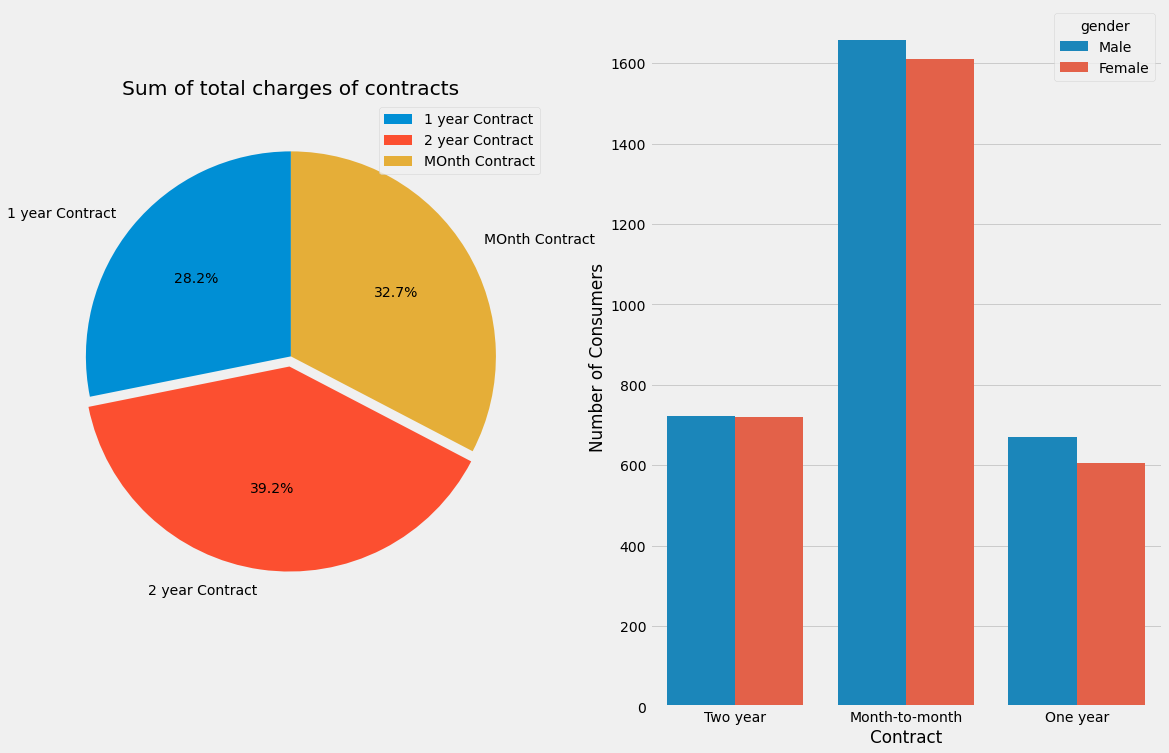

In [260]:
plt.figure(figsize=(18,12))
plt.subplot(121)
plt.pie([oy,ty,Mm],autopct ='%1.1f%%',labels=['1 year Contract','2 year Contract','MOnth Contract'],explode = [0,0.05,0],startangle=90)
plt.title('Sum of total charges of contracts')
plt.legend()

plt.subplot(122)
sns.countplot(x=df1['Contract'],hue = df1['gender']);
plt.ylabel('Number of Consumers')

In [268]:
st = df1.groupby(['tenure','Contract'])["TotalCharges(USD)"].max()
st = pd.DataFrame(st)
st.reset_index(inplace= True)
#st = st.drop_duplicates(subset = ['tenure'],keep='first')
One_year = st[st['Contract']=='One year'].loc[:,['tenure','Contract','TotalCharges(USD)']]
two_year = st[st['Contract']=='Two year'].loc[:,['tenure','Contract','TotalCharges(USD)']]
m2m = st[st['Contract']=='Month-to-month'].loc[:,['tenure','Contract','TotalCharges(USD)']]


In [278]:
st = df1.groupby(['tenure','Contract'])["TotalCharges(USD)"].max()
st = pd.DataFrame(st)
st.head(20)

TotalCharges(USD)
tenure Contract                         
0      One year                     0.00
       Two year                     0.00
1      Month-to-month             102.45
       One year                    74.10
       Two year                    20.45
2      Month-to-month             242.80
       One year                    47.70
3      Month-to-month             335.75
       One year                   220.45
       Two year                   213.35
4      Month-to-month             442.85
       One year                   117.80
       Two year                   116.95
5      Month-to-month             550.60
       One year                   347.40
       Two year                   106.90
6      Month-to-month             577.60
       One year                   255.60
       Two year                   493.40
7      Month-to-month             715.00

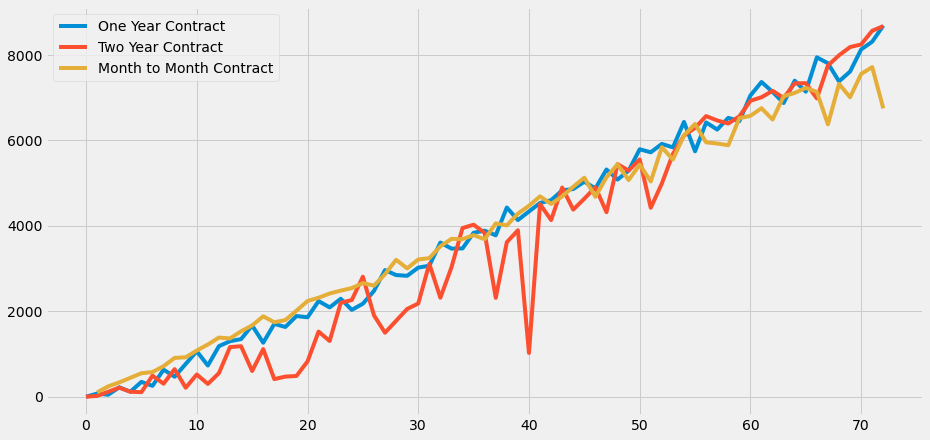

In [264]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,7))
plt.plot(One_year.tenure,One_year['TotalCharges(USD)'],label = 'One Year Contract')
plt.plot(two_year.tenure,two_year['TotalCharges(USD)'], label = 'Two Year Contract')
plt.plot(m2m.tenure,m2m['TotalCharges(USD)'] ,label = 'Month to Month Contract')
plt.legend();